In [1]:
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import Image as Image_
import math

C:\Users\quark\Anaconda3\envs\myenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\quark\Anaconda3\envs\myenv\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\quark\Anaconda3\envs\myenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


## 画像にランダムなノイズを混ぜたいので、試す

In [9]:
import cv2
import matplotlib.pyplot as plt

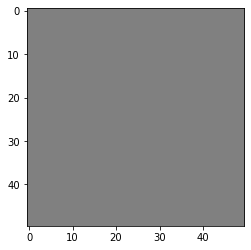

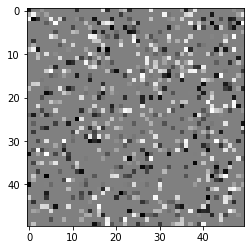

In [82]:
img = Image.new('L', (50, 50), 128)
img.save('random_noise_test.png')
img = cv2.imread('random_noise_test.png')
plt.imshow(img, cmap='Greys')
plt.show()

pts_x = np.random.randint(0, 50, 800)
pts_y = np.random.randint(0, 50, 800)

for i in range(len(pts_y)):
    img[(pts_y[i], pts_x[i])] = np.random.randint(0, 256)
plt.imshow(img, cmap='Greys')
plt.show()

## 一旦レシートの下の画像にこれを差し込んだらどう？

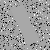

In [192]:
#試しフェーズ
def makeRectangle(l, w, theta, offset=(0,0)):
    c, s = math.cos(theta), math.sin(theta)
    rectCoords = [(l/2.0, w/2.0), (l/2.0, -w/2.0), (-l/2.0, -w/2.0), (-l/2.0, w/2.0)]
    return [(c*x-s*y+offset[0], s*x+c*y+offset[1]) for (x,y) in rectCoords]

L=50; W=50

random_color_base = np.random.randint(0, 255) # MAX 254
random_color_rectangle = np.random.randint(random_color_base + 1, 256) #MAX 255 少なくともbaseカラーよりは白い

image = Image.new("L", (L, W), random_color_base ) #8bit 白黒 0 = 黒 255 = 白
image_1 = np.array(image, dtype=np.uint8)
pts_x = np.random.randint(0, 50, 800)
pts_y = np.random.randint(0, 50, 800)

for i in range(len(pts_y)):
    image_1[(pts_y[i], pts_x[i])] = np.random.randint(0, 256)
image_2 = Image.fromarray(image_1)
draw = ImageDraw.Draw(image_2)

angle = np.random.randint(-45, 46)
size = np.random.randint(70, 131) / 100
vertices = makeRectangle(12 * size, 40 * size, angle *math.pi/180, offset=(L/2, W/2))
draw.polygon(vertices, fill= random_color_rectangle)
image_2.save(f"test.png")
Image_('test.png')

In [193]:
#生成フェーズ
angle_list = []
array_list = []
L=50; W=50
from tqdm import tqdm
for i in tqdm(range(350000)): #作成枚数
    random_color_base = np.random.randint(0, 255) # MAX 254
    random_color_rectangle = np.random.randint(random_color_base + 1, 256) #MAX 255 少なくともbaseカラーよりは白い

    image = Image.new("L", (L, W), random_color_base ) #8bit 白黒 0 = 黒 255 = 白
    image_1 = np.array(image, dtype=np.uint8)
    pts_x = np.random.randint(0, 50, 800)
    pts_y = np.random.randint(0, 50, 800)
    for i in range(len(pts_y)):
        image_1[(pts_y[i], pts_x[i])] = np.random.randint(0, 256)
    image_2 = Image.fromarray(image_1)
    draw = ImageDraw.Draw(image_2)

    angle = np.random.randint(-45, 46)
    size = np.random.randint(70, 131) / 100
    vertices = makeRectangle(12 * size, 40 * size, angle *math.pi/180, offset=(L/2, W/2))
    draw.polygon(vertices, fill= random_color_rectangle)
    angle_list.append(angle)
    array_list.append(np.array(image_2))
    #画像は指定のディレクトリに保存
    #image.save(f"photos/random_rectangle_{i}.png")

#これで保存可能
#MNISTみたいに画像保存して画像を配列にして角度ラベルと一緒に保存すれば良いんじゃないか
np.savez_compressed('learning_photo_data', np.array(array_list), np.array(angle_list))

100%|█████████████████████████████████████████████████████████████████████████| 350000/350000 [12:30<00:00, 466.05it/s]
